Fit lines in Provenance
------------------------

In [13]:
import pandas as pd
import sympy as sym

In [2]:
from scipy.optimize import curve_fit
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [140]:
font = {'weight': 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

In [4]:
df = pd.read_json('../data/data_dec_2017_clean.json')

In [5]:
yearly_provenance = df.groupby(['unique_key','provenance', 'date']).size().reset_index().groupby(['provenance', 'date']).size()

In [6]:
journals = ['IEEE', 'Nature', 'PLOS', 'arXiv', 'Springer']

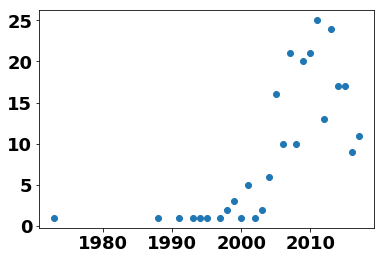

In [23]:
for j in [journals[0]]:
    plt.scatter(yearly_provenance[j].index, yearly_provenance[j].values)

In [27]:
colors = list(matplotlib.cm.plasma(np.linspace(0, 1, 6)))
linestyles = [':', '--', '-', '--', '-', '--']

Fit lines
----------

In [236]:
def func(x, a, b):
    return a * np.exp(b * x)

In [224]:
def fit_line_to_provenance(journal, func, c, initial_fit=None):
    fig = plt.figure(figsize=(7, 5))
    start_year = yearly_provenance[journal].index[0] - 1
        
    x = np.array([year - start_year for year in yearly_provenance[journal].index + 1])
    y = yearly_provenance[journal].values
    
    if initial_fit == None:
        popt, pcov = curve_fit(func, x,  y)
    
    else:
        popt, pcov = curve_fit(func, x,  y, p0=initial_fit)
    
    plt.plot(x, func(x, *popt), 'g--', color=c, linewidth=3,
             label=r'$%.3f x^{%.3f}$' % (popt[0], popt[1]))
    plt.scatter(x, y, s=30, color='green')
    plt.title(journal, fontsize=12, fontweight="bold")
    
    xs = np.arange(start_year, yearly_provenance[journal].index[-1] + 2, 3)
    labels = [str(i) for i in xs]
    plt.xticks(np.arange(min(x), max(x) + 2, 3.0), labels, rotation='vertical')
    plt.legend()
    plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/{}_fit.pdf'.format(journal),
               bbox_inches='tight')
    return popt

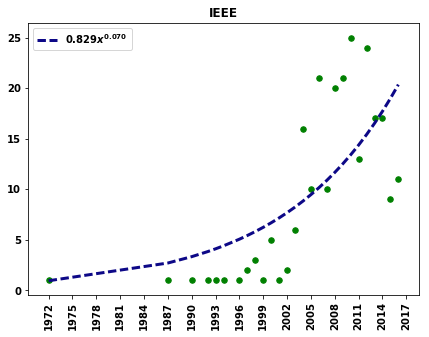

In [225]:
ieee = fit_line_to_provenance('IEEE', func, c=colors[0], initial_fit=(1, 0))

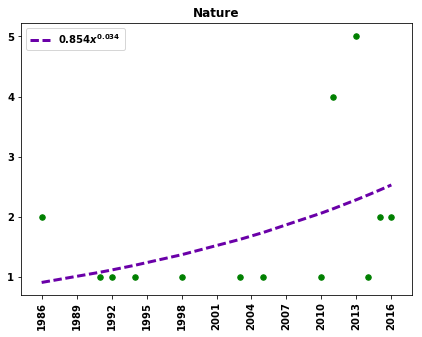

In [226]:
nature = fit_line_to_provenance('Nature', func, c=colors[1], initial_fit=(1, 0))

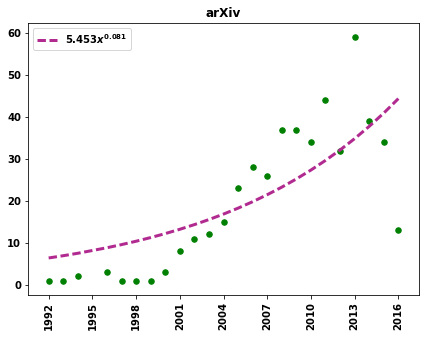

In [227]:
arxiv = fit_line_to_provenance('arXiv', func, c=colors[2], initial_fit=(0, 2))

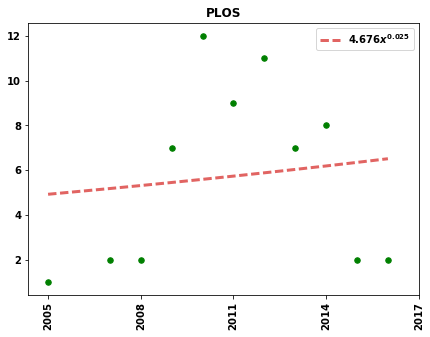

In [228]:
plos = fit_line_to_provenance('PLOS', func, c=colors[3])

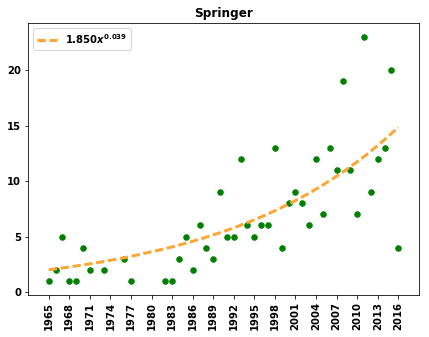

In [229]:
springer = fit_line_to_provenance('Springer', func, c=colors[4], initial_fit=(2, 0))

In [20]:
table = pd.DataFrame(columns=['journal', '$a$', '$b$'],
                     data=[['IEEE', ieee[0], ieee[1]], ['Nature', nature[0], nature[1]],
                           ['arXiv', arxiv[0], arxiv[1]], ['PLOS', plos[0], plos[1]],
                           ['Springer', springer[0], springer[1]]])

In [271]:
table.round({'$a$': 3, '$b$': 3}).sort_values('$b$').to_latex('/home/nightwing/rsc/Literature-Article/assets/exponential.tex')

In [308]:
linestyles = [':', '--', '-', ':', '--', ':']

In [311]:
def get_points(func, popt):
    x = np.linspace(0, 30)

    y = func(x, *popt)
    
    return x, y

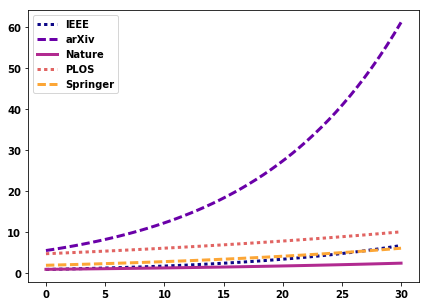

In [313]:
fig = plt.subplots(figsize=(7, 5))
i = 0
for popt, label in zip([ieee, arxiv, nature, plos, springer],
                       ['IEEE', 'arXiv', 'Nature', 'PLOS', 'Springer']):
    
    xs, ys = get_points(func, popt)
    plt.plot(xs, ys, 'g--', linewidth=3, label=label, color=colors[i],
             linestyle=linestyles[i])
    plt.legend()
    i += 1
plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/journal_trends.pdf'.format(journal),
            bbox_inches='tight')

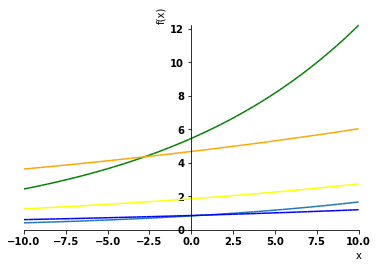

In [300]:
p1 = sym.plot(ieee[0] * sym.exp(ieee[1] * x), show=False)

for api, color in zip([arxiv, nature, plos, springer], ['green', 'blue', 'orange', 'yellow']):
    p = sym.plot(api[0] * sym.exp(api[1] * x), xlim=(0, 20), show=False, line_color=color)
    p1.extend(p)
p1.show()

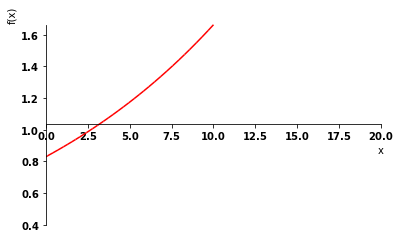

In [274]:
p1 = sym.plot(ieee[0] * sym.exp(ieee[1] * x), show=False, line_color="red",
              xlim=(0, 20), ylim)
p1.show()

In [312]:
def fit_polynomial_to_provenance(journal, power):
    start_year = yearly_provenance[journal].index[0] - 1
    
    x = np.array([year - start_year for year in yearly_provenance[journal].index])
    y = yearly_provenance[journal].values
    z = np.polyfit(x, y, power)
    p = np.poly1d(z)
    
    plt.plot(x, y, '.', x, p(x), '-')
    plt.show()
    
    return p

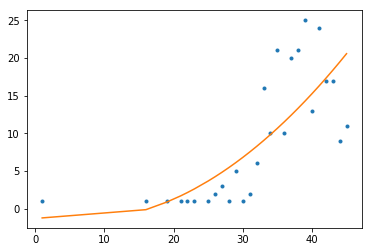

poly1d([ 0.01456129, -0.17456494, -1.06894843])

In [313]:
fit_polynomial_to_provenance('IEEE', 2)

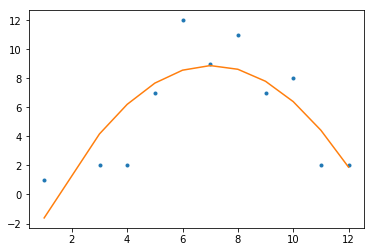

poly1d([-0.28618187,  4.03824535, -5.36665097])

In [314]:
fit_polynomial_to_provenance('PLOS', 2)

Rate
-----

In [272]:
yearly_df = df.groupby(['unique_key', 'date']).size().reset_index().groupby('date').size()

In [278]:
def growth_rate(series):
    first = series.iloc[0]
    last = series.iloc[-1]
    
    n = len(series)
    
    return (last / first) ** (1/ n) - 1

In [281]:
growth_rate(yearly_df) * 100

6.6892417367938828

In [6]:
import sympy as sym

In [14]:
x = sym.symbols('x')

In [9]:
xs = np.linspace(0, 10, 10)

In [12]:
ys = sym.exp(x)

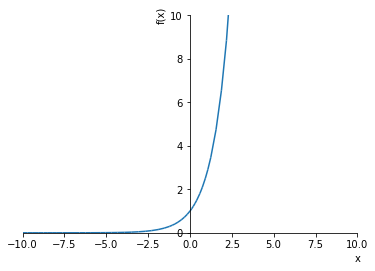

In [18]:
sym.plot(ys, ylim=(0, 10))

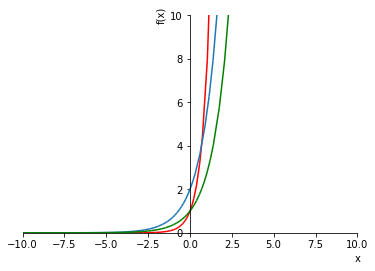

In [31]:
p1 = sym.plot(sym.exp(2 * x), ylim=(0, 10), show=False, line_color="red")
p2 = sym.plot(2 * sym.exp(x), ylim=(0, 10), show=False)
p3 = sym.plot(sym.exp(x), ylim=(0, 10), show=False, line_color="green")
p1.extend(p2)
p1.extend(p3)
p1.show()